<a href="https://colab.research.google.com/github/aswathynair2170/Regression-Analysis/blob/main/Parkinsons_Disease_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Diagnosis.csv to Diagnosis (1).csv
Saving dataset.csv to dataset (1).csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import seaborn as sns

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset (1).csv']))

# Load the diagnosis dataset
diagnosis_df = pd.read_csv('Diagnosis (1).csv')

In [ ]:
# Create a new unique identifier by combining "Type" and "ID"
diagnosis_df['Unique_ID'] = diagnosis_df['Type'] + '_' + diagnosis_df['ID'].astype(str)

In [ ]:
diagnosis_df

,ID,Type,DIAGNOSIS,Unique_ID
0,1.0,Control,Control,Control_1.0
1,2.0,Control,Control,Control_2.0
2,3.0,Control,Control,Control_3.0
3,4.0,Control,Control,Control_4.0
4,5.0,Control,Control,Control_5.0
...,...,...,...,...
82,54.0,Patient,PD,Patient_54.0
83,55.0,Patient,PDD,Patient_55.0
84,56.0,Patient,PD-MCI,Patient_56.0
85,57.0,Patient,PD-MCI,Patient_57.0


In [ ]:
# Create a mapping dictionary for ID replacement
id_mapping = dict(zip(diagnosis_df['ID'], diagnosis_df['Unique_ID']))

In [ ]:
# Replace ID column values based on PC column
df['ID'] = df.apply(lambda row: id_mapping[row['ID']] if row['PC'] == 1 else row['ID'], axis=1)

In [ ]:
df

,ID,Dominant,Attempts,PC,Duration,Time,AreaError,TimeTriangles_1,TimeTriangles_2,TimeTriangles_3,TimeTriangles_4,TimeTriangles_5,Distance,LeaveSurface,Side,TimeContact,ZeroVel,ZeroAcc
0,10.0,1,1,0,0.0,35.590,111.675922,9957,4331,5062,8047,7954,5.659210,1,1,34.350,3.895,2.795
1,10.0,1,2,0,0.0,27.735,106.825450,7185,5986,4701,5561,5879,4.758624,1,1,27.710,2.945,2.055
2,10.0,0,1,0,0.0,29.715,161.018418,7985,6858,6045,4363,5043,4.857465,2,1,29.660,2.120,2.055
3,10.0,0,2,0,0.0,26.650,116.310537,6564,6000,4420,5327,4752,4.837145,1,1,26.575,1.360,1.430
4,1.0,1,1,0,0.0,39.665,167.348008,11905,6366,8245,7358,8737,5.116981,1,1,39.650,3.705,4.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Patient_8.0,0,2,1,1.5,32.150,147.944077,6985,6174,6903,6450,5783,4.645332,1,1,32.105,1.015,3.435
321,Patient_9.0,1,1,1,7.0,33.410,125.701464,10191,9231,2719,6875,7719,5.839282,2,1,29.795,4.725,3.165
322,Patient_9.0,1,2,1,7.0,23.935,117.619378,7644,3719,5001,4640,3889,4.784715,1,1,23.845,3.290,2.170
323,Patient_9.0,0,1,1,7.0,24.750,204.258680,8180,5376,3889,3849,4531,4.802904,1,1,24.680,2.390,2.100


In [ ]:
df.to_csv('preprocessed_data.csv', index=False)

In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())


# Handle missing values (if any)
df.dropna(inplace=True)  # Remove rows with missing values

ID                 0
Dominant           0
Attempts           0
PC                 0
Duration           0
Time               0
AreaError          0
TimeTriangles_1    0
TimeTriangles_2    0
TimeTriangles_3    0
TimeTriangles_4    0
TimeTriangles_5    0
Distance           0
LeaveSurface       0
Side               0
TimeContact        0
ZeroVel            0
ZeroAcc            0
dtype: int64


In [ ]:
'''
# Create a new unique identifier by combining "Type" and "ID"
diagnosis_df['Unique_ID'] = diagnosis_df['Type'] + '_' + diagnosis_df['ID'].astype(str)

# Create a dictionary to map unique_id to corresponding categories from dataset2
category_mapping = dict(zip(diagnosis_df['Unique_ID'], diagnosis_df['DIAGNOSIS']))

# Apply the mapping to categorize patients in dataset1
df['DIAGNOSIS'] = df['ID'].map(category_mapping)
'''

'\n# Create a new unique identifier by combining "Type" and "ID"\ndiagnosis_df[\'Unique_ID\'] = diagnosis_df[\'Type\'] + \'_\' + diagnosis_df[\'ID\'].astype(str)\n\n# Create a dictionary to map unique_id to corresponding categories from dataset2\ncategory_mapping = dict(zip(diagnosis_df[\'Unique_ID\'], diagnosis_df[\'DIAGNOSIS\']))\n\n# Apply the mapping to categorize patients in dataset1\ndf[\'DIAGNOSIS\'] = df[\'ID\'].map(category_mapping)\n'

In [ ]:
#df

In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())


# Handle missing values (if any)
df.dropna(inplace=True)  # Remove rows with missing values

ID                 0
Dominant           0
Attempts           0
PC                 0
Duration           0
Time               0
AreaError          0
TimeTriangles_1    0
TimeTriangles_2    0
TimeTriangles_3    0
TimeTriangles_4    0
TimeTriangles_5    0
Distance           0
LeaveSurface       0
Side               0
TimeContact        0
ZeroVel            0
ZeroAcc            0
dtype: int64


In [ ]:
df

,ID,Dominant,Attempts,PC,Duration,Time,AreaError,TimeTriangles_1,TimeTriangles_2,TimeTriangles_3,TimeTriangles_4,TimeTriangles_5,Distance,LeaveSurface,Side,TimeContact,ZeroVel,ZeroAcc
0,10.0,1,1,0,0.0,35.590,111.675922,9957,4331,5062,8047,7954,5.659210,1,1,34.350,3.895,2.795
1,10.0,1,2,0,0.0,27.735,106.825450,7185,5986,4701,5561,5879,4.758624,1,1,27.710,2.945,2.055
2,10.0,0,1,0,0.0,29.715,161.018418,7985,6858,6045,4363,5043,4.857465,2,1,29.660,2.120,2.055
3,10.0,0,2,0,0.0,26.650,116.310537,6564,6000,4420,5327,4752,4.837145,1,1,26.575,1.360,1.430
4,1.0,1,1,0,0.0,39.665,167.348008,11905,6366,8245,7358,8737,5.116981,1,1,39.650,3.705,4.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Patient_8.0,0,2,1,1.5,32.150,147.944077,6985,6174,6903,6450,5783,4.645332,1,1,32.105,1.015,3.435
321,Patient_9.0,1,1,1,7.0,33.410,125.701464,10191,9231,2719,6875,7719,5.839282,2,1,29.795,4.725,3.165
322,Patient_9.0,1,2,1,7.0,23.935,117.619378,7644,3719,5001,4640,3889,4.784715,1,1,23.845,3.290,2.170
323,Patient_9.0,0,1,1,7.0,24.750,204.258680,8180,5376,3889,3849,4531,4.802904,1,1,24.680,2.390,2.100


In [ ]:
'''
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical_column' is the name of the column containing categorical data
categorical_column = 'DIAGNOSIS'

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

# Now, df[categorical_column] contains the label-encoded values

# Display the mapping between original categories and encoded values
print("Label Encoding Mapping:")
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {encoded}")

'''


'\nfrom sklearn.preprocessing import LabelEncoder\n\n# Assuming \'categorical_column\' is the name of the column containing categorical data\ncategorical_column = \'DIAGNOSIS\'\n\n# Create a label encoder instance\nlabel_encoder = LabelEncoder()\n\n# Fit and transform the categorical column\ndf[categorical_column] = label_encoder.fit_transform(df[categorical_column])\n\n# Now, df[categorical_column] contains the label-encoded values\n\n# Display the mapping between original categories and encoded values\nprint("Label Encoding Mapping:")\nfor original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):\n    print(f"{original}: {encoded}")\n\n'

Regression Analysis

In [ ]:
#df

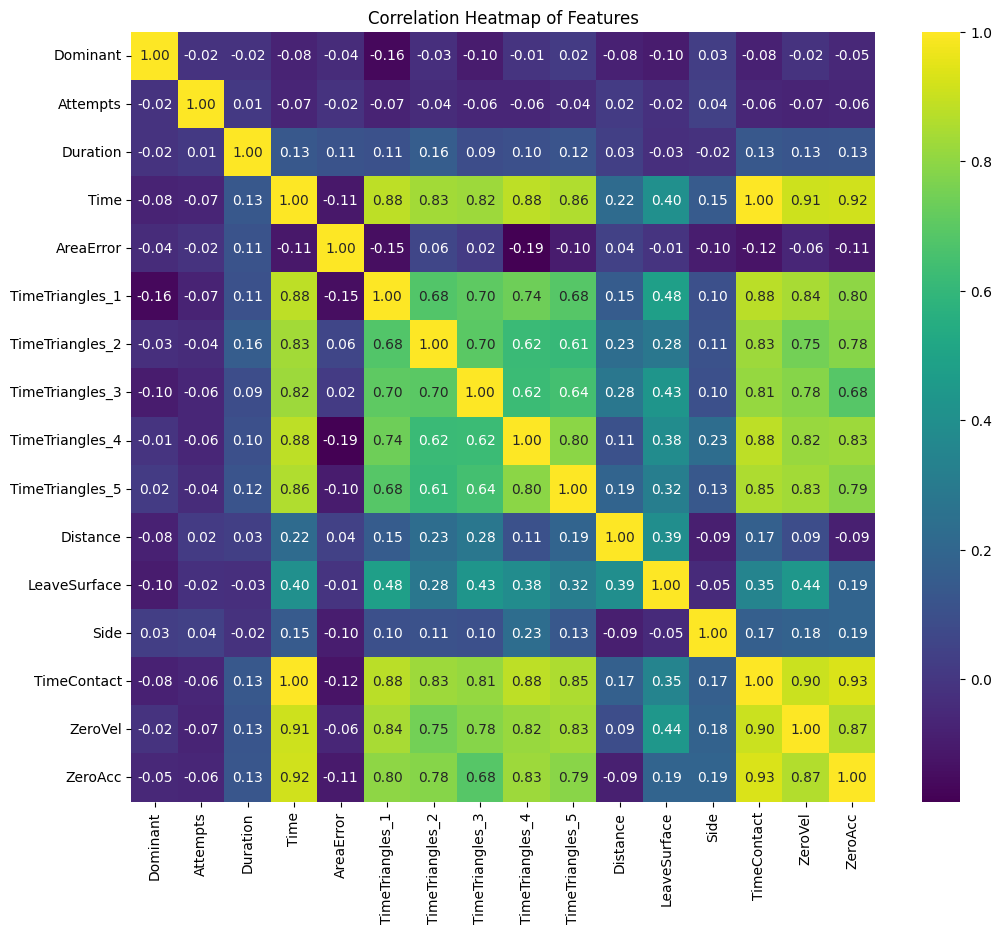

In [ ]:
# Separate features and target variable
X = df.drop(columns=[ 'PC','ID'])  # Features
y = df['PC']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute Pearson's correlation matrix
correlation_matrix = X_train.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# Display the processed data after correlation analysis
print(X_train.head())

     Dominant  Attempts  Duration    Time   AreaError  TimeTriangles_1  \
172         0         1       3.5  51.720  168.045257            12611   
183         1         2       9.0  66.110  162.532588            19413   
17          1         2       0.0  42.575  203.394364            11936   
24          1         1       0.0  41.465   94.021934            13928   
132         0         1       5.5  32.055  240.125343             9483   

     TimeTriangles_2  TimeTriangles_3  TimeTriangles_4  TimeTriangles_5  \
172            15811             8221             9655             7781   
183            15606             5145            13651            14567   
17              6966             6643             8958             9919   
24              7088             7385             9728             7530   
132             5880             5965             8751             5999   

     Distance  LeaveSurface  Side  TimeContact  ZeroVel  ZeroAcc  
172  4.638555             1     1    

<ipython-input-21-96e341042823>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_highly_correlated = df[highly_correlated_features]


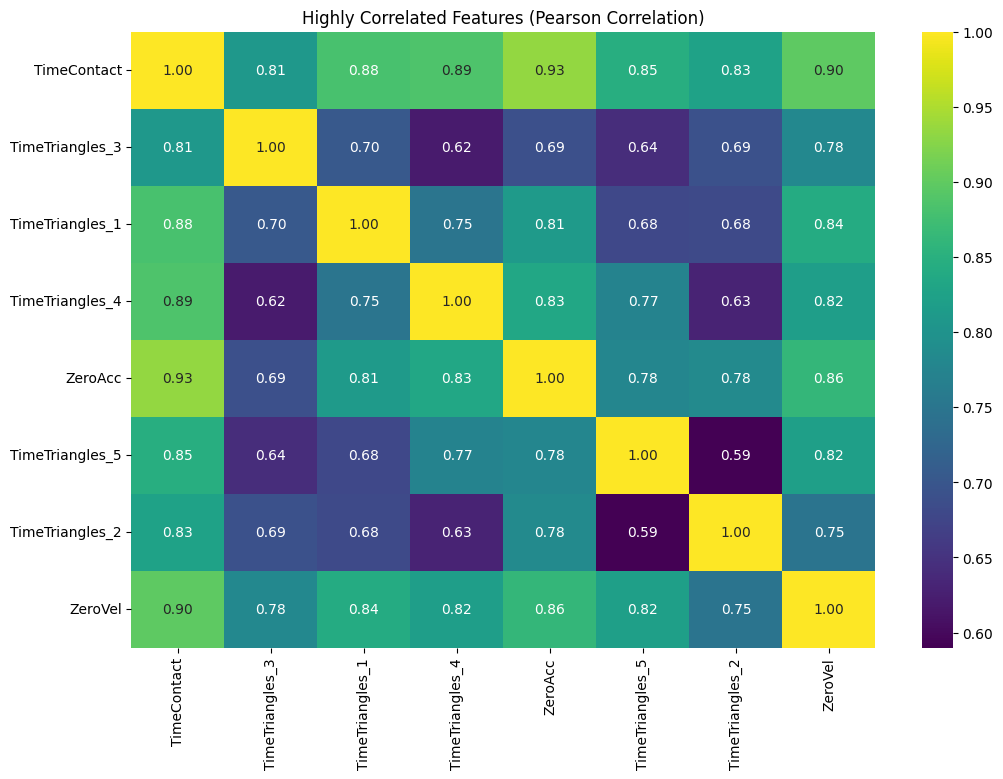

In [ ]:
# Select the highly correlated features
threshold = 0.7  #  adjust the threshold as needed
highly_correlated_features = set()

# Iterate through the correlation matrix and find highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Create a DataFrame with only the highly correlated features
df_highly_correlated = df[highly_correlated_features]

# Display the correlation heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df_highly_correlated.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Highly Correlated Features (Pearson Correlation)')
plt.show()

In [ ]:
print(df_highly_correlated)

     TimeContact  TimeTriangles_3  TimeTriangles_1  TimeTriangles_4  ZeroAcc  \
0         34.350             5062             9957             8047    2.795   
1         27.710             4701             7185             5561    2.055   
2         29.660             6045             7985             4363    2.055   
3         26.575             4420             6564             5327    1.430   
4         39.650             8245            11905             7358    4.165   
..           ...              ...              ...              ...      ...   
320       32.105             6903             6985             6450    3.435   
321       29.795             2719            10191             6875    3.165   
322       23.845             5001             7644             4640    2.170   
323       24.680             3889             8180             3849    2.100   
324       22.470             4176             8890             3437    1.810   

     TimeTriangles_5  TimeTriangles_2  

In [ ]:
# Save the new DataFrame to a CSV file
df_highly_correlated.to_csv('selected_features_dataset.csv', index=False)

----- Lasso Regression -----
Accuracy: 0.9076923076923077
Confusion Matrix:
[[22  2]
 [ 4 37]]


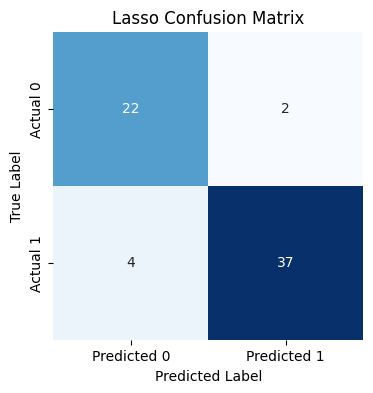

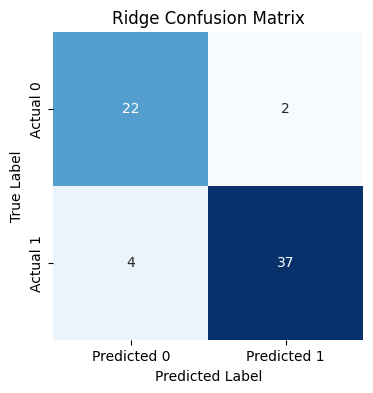

Sensitivity: 0.9024390243902439
Specificity: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.95      0.90      0.92        41

    accuracy                           0.91        65
   macro avg       0.90      0.91      0.90        65
weighted avg       0.91      0.91      0.91        65



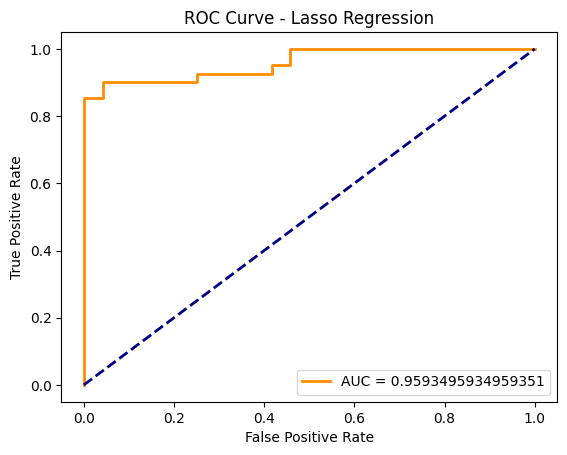

----- Ridge Regression -----
Accuracy: 0.8153846153846154
Confusion Matrix:
[[17  7]
 [ 5 36]]


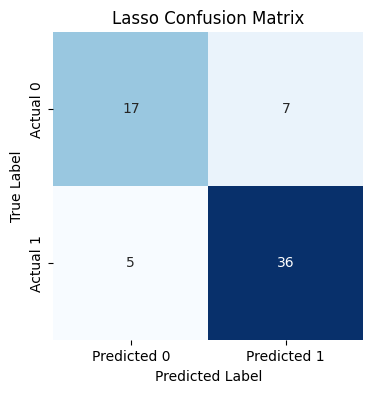

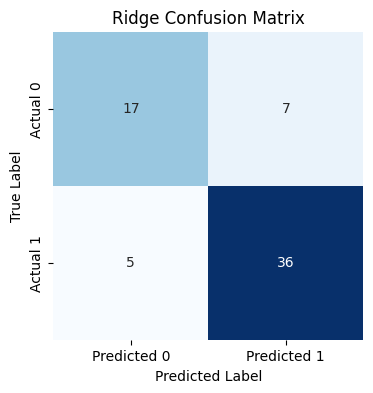

Sensitivity: 0.8780487804878049
Specificity: 0.7083333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.84      0.88      0.86        41

    accuracy                           0.82        65
   macro avg       0.80      0.79      0.80        65
weighted avg       0.81      0.82      0.81        65



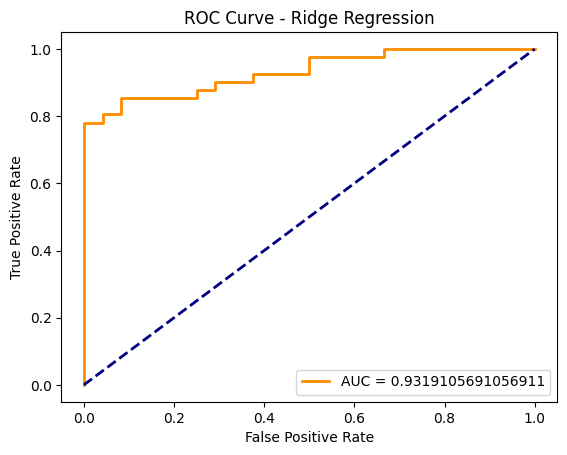

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the models
def evaluate_model(predictions, model_name):
    print(f"----- {model_name} -----")
    accuracy = accuracy_score(y_test, predictions.round())
    print(f"Accuracy: {accuracy}")

    confusion = confusion_matrix(y_test, predictions.round())
    print(f"Confusion Matrix:\n{confusion}")

    # Plot the confusion matrix
    # Lasso
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Lasso Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Ridge
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Ridge Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


    sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")

    classification_report_str = classification_report(y_test, predictions.round())
    print(f"Classification Report:\n{classification_report_str}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate Lasso
evaluate_model(lasso_predictions, "Lasso Regression")

# Evaluate Ridge
evaluate_model(ridge_predictions, "Ridge Regression")



Lasso Regression Confusion Matrix:
[[22  2]
 [ 4 37]]


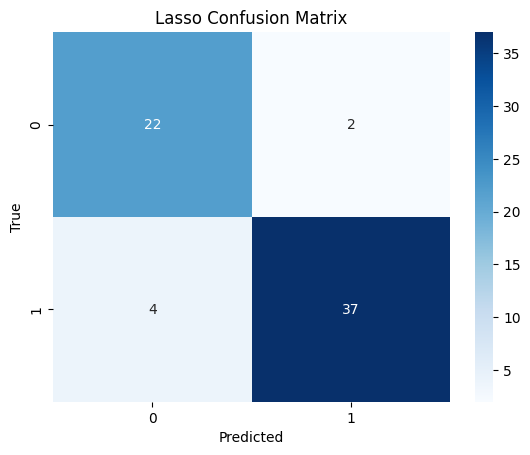

Lasso Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.95      0.90      0.92        41

    accuracy                           0.91        65
   macro avg       0.90      0.91      0.90        65
weighted avg       0.91      0.91      0.91        65

Lasso Regression Accuracy: 0.9077
Lasso Regression Sensitivity: 0.9024
Lasso Regression Specificity: 0.9167


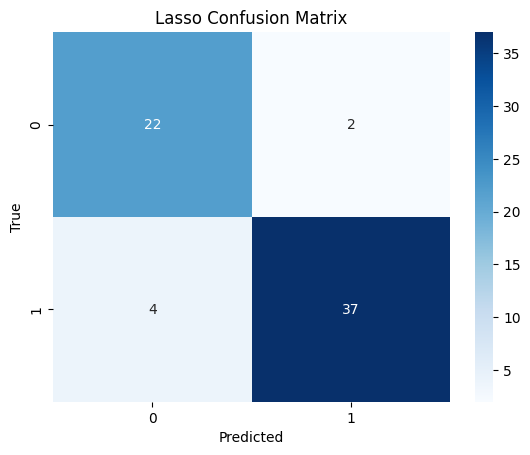

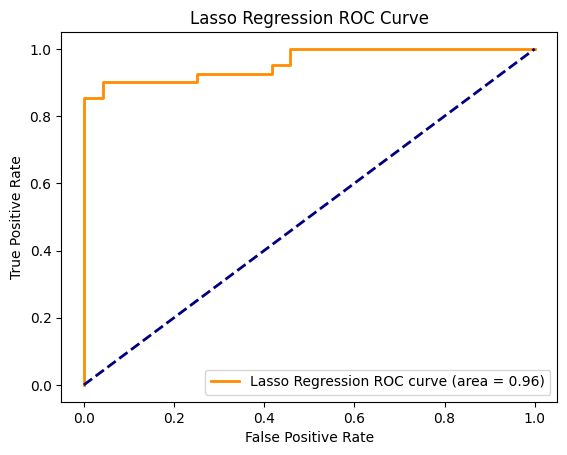

Ridge Regression Confusion Matrix:
[[17  7]
 [ 5 36]]


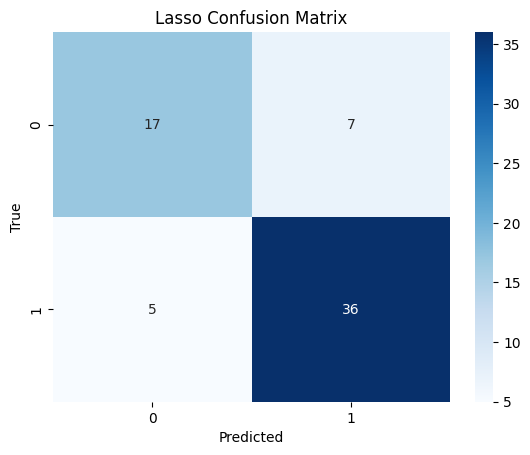

Ridge Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.84      0.88      0.86        41

    accuracy                           0.82        65
   macro avg       0.80      0.79      0.80        65
weighted avg       0.81      0.82      0.81        65

Ridge Regression Accuracy: 0.8154
Ridge Regression Sensitivity: 0.8780
Ridge Regression Specificity: 0.7083


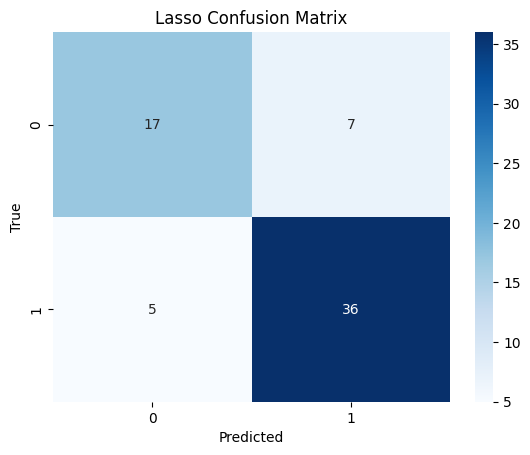

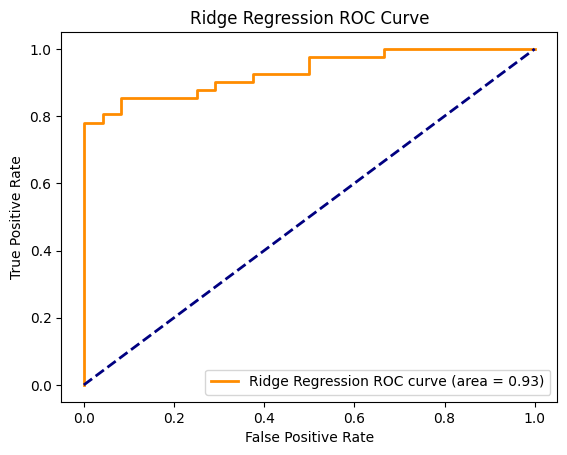

List of Parkinson's Disease Patients (Lasso):
17            13.0
18            13.0
47            23.0
48            23.0
75             3.0
          ...     
320    Patient_8.0
321    Patient_9.0
322    Patient_9.0
323    Patient_9.0
324    Patient_9.0
Name: ID, Length: 210, dtype: object

List of Parkinson's Disease Patients (Ridge):
0             10.0
5              1.0
16            13.0
17            13.0
18            13.0
          ...     
320    Patient_8.0
321    Patient_9.0
322    Patient_9.0
323    Patient_9.0
324    Patient_9.0
Name: ID, Length: 218, dtype: object


In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluation metrics
def evaluate_model(predictions, model_name):
    # Convert predictions to binary (0 or 1)
    predictions_binary = np.round(predictions)



    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions_binary)
    print(f"{model_name} Confusion Matrix:\n{cm}")

    # Plot Lasso Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Lasso Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    report = classification_report(y_test, predictions_binary)
    print(f"{model_name} Classification Report:\n{report}")

    # Accuracy
    accuracy = accuracy_score(y_test, predictions_binary)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Sensitivity and Specificity
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    print(f"{model_name} Sensitivity: {sensitivity:.4f}")
    print(f"{model_name} Specificity: {specificity:.4f}")

     # Plot Ridge Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Lasso Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate Lasso Regression
evaluate_model(lasso_predictions, "Lasso Regression")

# Evaluate Ridge Regression
evaluate_model(ridge_predictions, "Ridge Regression")

# Print the list of Parkinson's disease patients using both models
lasso_parkinsons_patients = df.loc[np.round(lasso_model.predict(X_scaled)) == 1, 'ID']
ridge_parkinsons_patients = df.loc[np.round(ridge_model.predict(X_scaled)) == 1, 'ID']

print("List of Parkinson's Disease Patients (Lasso):")
print(lasso_parkinsons_patients)

print("\nList of Parkinson's Disease Patients (Ridge):")
print(ridge_parkinsons_patients)


In [ ]:
lasso_parkinsons_patients

17            13.0
18            13.0
47            23.0
48            23.0
75             3.0
          ...     
320    Patient_8.0
321    Patient_9.0
322    Patient_9.0
323    Patient_9.0
324    Patient_9.0
Name: ID, Length: 210, dtype: object

In [ ]:
pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 29.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(lasso_parkinsons_patients)

17             13.0
18             13.0
47             23.0
48             23.0
75              3.0
78              3.0
101             9.0
104    Patient_10.0
106     Patient_1.0
107     Patient_1.0
108     Patient_1.0
109     Patient_1.0
110    Patient_11.0
111    Patient_11.0
112    Patient_11.0
113    Patient_11.0
114    Patient_12.0
115    Patient_12.0
116    Patient_12.0
117    Patient_12.0
118    Patient_13.0
119    Patient_13.0
120    Patient_13.0
121    Patient_13.0
122    Patient_14.0
123    Patient_14.0
124    Patient_14.0
125    Patient_14.0
126    Patient_15.0
127    Patient_15.0
128    Patient_15.0
129    Patient_15.0
130    Patient_16.0
131    Patient_16.0
132    Patient_16.0
133    Patient_16.0
134    Patient_17.0
135    Patient_17.0
136    Patient_17.0
137    Patient_17.0
138    Patient_18.0
139    Patient_18.0
140    Patient_18.0
141    Patient_18.0
142    Patient_19.0
143    Patient_19.0
144    Patient_19.0
145    Patient_19.0
146    Patient_20.0
147    Patient_20.0


In [ ]:
# Drop duplicates from the entire DataFrame
lasso_no_duplicates = lasso_parkinsons_patients.drop_duplicates()

# Display the DataFrame without duplicates
print(lasso_no_duplicates)
# Display the total number of items
total_patients = len(lasso_no_duplicates)
print("\nTotal number of Patients:", total_patients)

17             13.0
47             23.0
75              3.0
101             9.0
104    Patient_10.0
106     Patient_1.0
110    Patient_11.0
114    Patient_12.0
118    Patient_13.0
122    Patient_14.0
126    Patient_15.0
130    Patient_16.0
134    Patient_17.0
138    Patient_18.0
142    Patient_19.0
146    Patient_20.0
150    Patient_21.0
154    Patient_22.0
158     Patient_2.0
162    Patient_23.0
166    Patient_24.0
170    Patient_25.0
174    Patient_26.0
178    Patient_27.0
182    Patient_28.0
186    Patient_29.0
190    Patient_30.0
194    Patient_31.0
198    Patient_32.0
202     Patient_3.0
206    Patient_33.0
210    Patient_34.0
216    Patient_35.0
218    Patient_38.0
222    Patient_39.0
226    Patient_40.0
230    Patient_41.0
234    Patient_42.0
238     Patient_4.0
242    Patient_43.0
246    Patient_44.0
250    Patient_45.0
254    Patient_46.0
258    Patient_47.0
262    Patient_48.0
266    Patient_49.0
270    Patient_50.0
274     Patient_5.0
282    Patient_52.0
286    Patient_53.0


In [ ]:
# Drop duplicates from the entire DataFrame
ridge_no_duplicates = ridge_parkinsons_patients.drop_duplicates()

# Display the DataFrame without duplicates
print(ridge_no_duplicates)
# Display the total number of items
total_patients_list = len(ridge_no_duplicates)
print("\nTotal number of Patients:", total_patients_list)

0              10.0
5               1.0
16             13.0
47             23.0
75              3.0
84              5.0
91              7.0
99              9.0
106     Patient_1.0
110    Patient_11.0
114    Patient_12.0
118    Patient_13.0
122    Patient_14.0
126    Patient_15.0
130    Patient_16.0
134    Patient_17.0
138    Patient_18.0
142    Patient_19.0
146    Patient_20.0
150    Patient_21.0
154    Patient_22.0
158     Patient_2.0
162    Patient_23.0
166    Patient_24.0
170    Patient_25.0
174    Patient_26.0
178    Patient_27.0
182    Patient_28.0
186    Patient_29.0
190    Patient_30.0
194    Patient_31.0
198    Patient_32.0
202     Patient_3.0
206    Patient_33.0
210    Patient_34.0
215    Patient_35.0
218    Patient_38.0
222    Patient_39.0
226    Patient_40.0
230    Patient_41.0
234    Patient_42.0
238     Patient_4.0
242    Patient_43.0
246    Patient_44.0
250    Patient_45.0
254    Patient_46.0
258    Patient_47.0
262    Patient_48.0
266    Patient_49.0
270    Patient_50.0


**Lasso**

Approximately 90.77% of the predictions made by the model were correct.

Precision is a measure of how many of the predicted positive instances are actually positive. In this case, precision is higher for class 1 (patients) than for class 0 (controls), which means that when the model predicts a patient, it is more likely to be correct.

Recall or Sensitivity is a measure of how many of the actual positive instances were predicted correctly. For both classes, the recall is relatively high, indicating that the model is good at capturing positive instances.

Sensitivity (Recall for Class 1):

Sensitivity for class 1 (patients) is 0.9024 or 90.24%. This indicates the proportion of actual patients that were correctly identified by the model.

Specificity (Recall for Class 0):

Specificity for class 0 (controls) is 0.9167 or 91.67%. This indicates the proportion of actual controls that were correctly identified by the model.
Overall, these metrics suggest that the Lasso Regression model is performing well on the given dataset, with high accuracy, good precision, recall, and F1-score.


Ridge

Accuracy (Overall Correct Predictions):

The overall accuracy of the Ridge Regression model is 0.8154 or 81.54%. This means that approximately 81.54% of the predictions made by the model were correct.


Precision: Precision is higher for class 1 (patients) than for class 0 (controls), indicating that when the model predicts a patient, it is more likely to be correct.

Recall (Sensitivity): Recall is higher for class 1 (patients) than for class 0 (controls), indicating that the model is better at capturing positive instances (patients).

Sensitivity (Recall for Class 1):

Sensitivity for class 1 (patients) is 0.8780 or 87.80%. This indicates the proportion of actual patients that were correctly identified by the model.

Specificity (Recall for Class 0):

Specificity for class 0 (controls) is 0.7083 or 70.83%. This indicates the proportion of actual controls that were correctly identified by the model.
Overall, these metrics suggest that your Ridge Regression model is performing reasonably well, with a good balance between precision and recall.

Regression analysis using most correlated features

Most correlated features: Index(['Duration', 'Time', 'TimeContact', 'TimeTriangles_2', 'TimeTriangles_5',
       'ZeroVel', 'ZeroAcc'],
      dtype='object')
Lasso Accuracy: 0.94
Lasso Sensitivity: 0.90
Lasso Specificity: 1.00
Lasso Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.90      0.95        41

    accuracy                           0.94        65
   macro avg       0.93      0.95      0.94        65
weighted avg       0.95      0.94      0.94        65

Ridge Accuracy: 0.92
Ridge Sensitivity: 0.90
Ridge Specificity: 0.96
Ridge Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.97      0.90      0.94        41

    accuracy                           0.92        65
   macro avg       0.91      0.93      0.92        65
weighted avg       0.93      0.92      0.92  

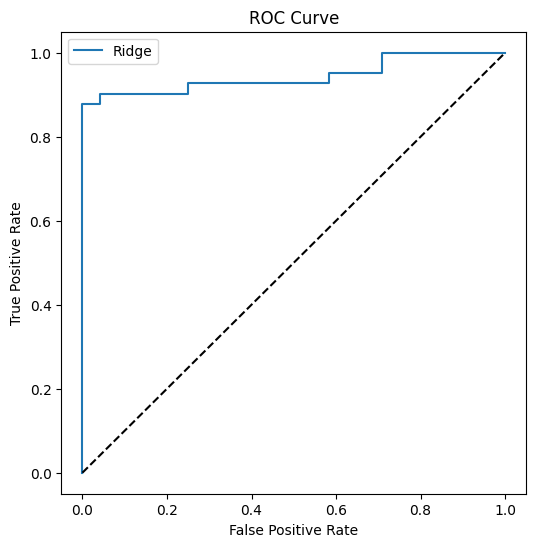

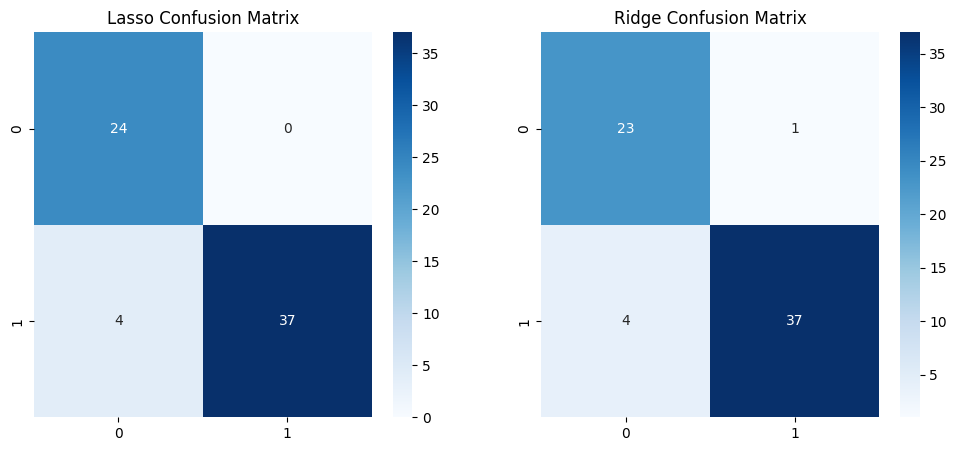

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X = df.drop("PC", axis=1)
y = df["PC"]

# Step 2: Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix["PC"].sort_values(ascending=False)
selected_features = correlation_with_target.index[1:8]  # Adjust the number of features as needed
print("Most correlated features:", selected_features)

# Step 3: Model Building
X_selected = df[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 4: Train the Models
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=0.01)
ridge_model = Ridge(alpha=0.01)

lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate metrics
accuracy_lasso = accuracy_score(y_test, y_pred_lasso.round())
accuracy_ridge = accuracy_score(y_test, y_pred_ridge.round())

print(f"Lasso Accuracy: {accuracy_lasso:.2f}")


# Step 6: Sensitivity and Specificity Calculation
tn_lasso, fp_lasso, fn_lasso, tp_lasso = confusion_matrix(y_test, y_pred_lasso.round()).ravel()
sensitivity_lasso = tp_lasso / (tp_lasso + fn_lasso)
specificity_lasso = tn_lasso / (tn_lasso + fp_lasso)

tn_ridge, fp_ridge, fn_ridge, tp_ridge = confusion_matrix(y_test, y_pred_ridge.round()).ravel()
sensitivity_ridge = tp_ridge / (tp_ridge + fn_ridge)
specificity_ridge = tn_ridge / (tn_ridge + fp_ridge)

print(f"Lasso Sensitivity: {sensitivity_lasso:.2f}")
print(f"Lasso Specificity: {specificity_lasso:.2f}")



# Lasso
classification_report_lasso = classification_report(y_test, y_pred_lasso.round())
print("Lasso Classification Report:\n", classification_report_lasso)



print(f"Ridge Accuracy: {accuracy_ridge:.2f}")
print(f"Ridge Sensitivity: {sensitivity_ridge:.2f}")
print(f"Ridge Specificity: {specificity_ridge:.2f}")

# Ridge
classification_report_ridge = classification_report(y_test, y_pred_ridge.round())
print("Ridge Classification Report:\n", classification_report_ridge)

# Step 7: ROC Curve and Confusion Matrix
# Plot ROC curve
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_pred_lasso)
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_pred_ridge)


plt.figure(figsize=(6, 6))
#plt.plot(fpr_lasso, tpr_lasso, label='Lasso')
plt.plot(fpr_ridge, tpr_ridge, label='Ridge')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Lasso Confusion Matrix
cm_lasso = confusion_matrix(y_test, y_pred_lasso.round())
sns.heatmap(cm_lasso, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Lasso Confusion Matrix')

# Ridge Confusion Matrix
cm_ridge = confusion_matrix(y_test, y_pred_ridge.round())
sns.heatmap(cm_ridge, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Ridge Confusion Matrix')

plt.show()




<ipython-input-32-59eab512b637>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.101e-02, tolerance: 5.460e-03
  model = cd_fast.enet_coordinate_descent(


Most correlated features: Index(['Duration', 'Time', 'TimeContact', 'TimeTriangles_2',
       'TimeTriangles_5'],
      dtype='object')

Lasso Regression Results:
Accuracy: 0.92
Sensitivity: 0.88
Specificity: 1.00
Confusion Matrix:
[[24  0]
 [ 5 36]]


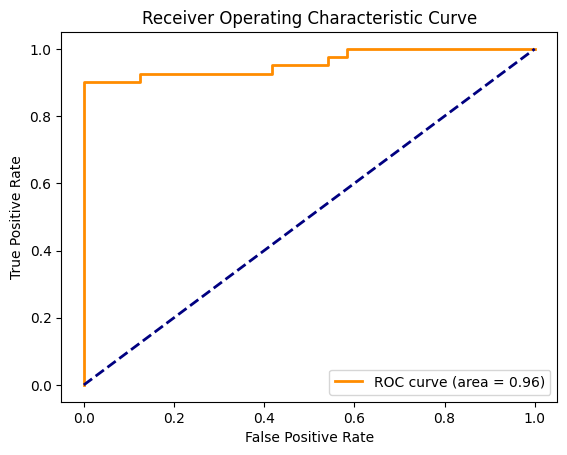


Ridge Regression Results:
Accuracy: 0.92
Sensitivity: 0.88
Specificity: 1.00
Confusion Matrix:
[[24  0]
 [ 5 36]]


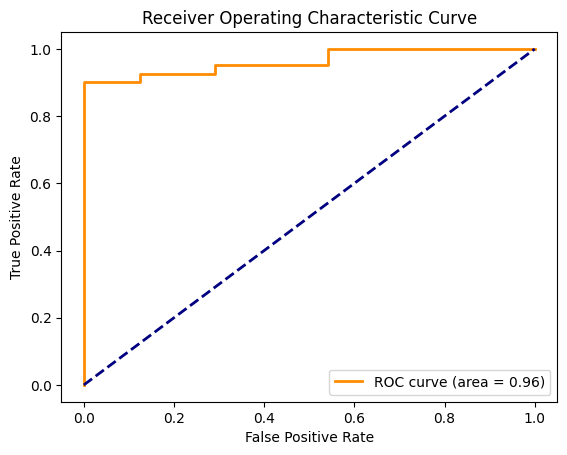

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your target variable is named 'PC'
X = df.drop(columns =['PC','ID'], axis=1)
y = df['PC']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Correlation analysis
correlation_matrix = df.corr()
most_correlated_features = correlation_matrix['PC'].sort_values(ascending=False).index[1:6]
print("Most correlated features:", most_correlated_features)

# Select the most correlated features
X_train_selected = X_train[most_correlated_features]
X_test_selected = X_test[most_correlated_features]

# Lasso regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_selected, y_train)
lasso_predictions = lasso_model.predict(X_test_selected)

# Ridge regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train_selected, y_train)
ridge_predictions = ridge_model.predict(X_test_selected)

# Evaluate models
def evaluate_model(predictions, y_true):
    accuracy = accuracy_score(y_true, predictions.round())
    confusion_mat = confusion_matrix(y_true, predictions.round())
    sensitivity = confusion_mat[1, 1] / (confusion_mat[1, 0] + confusion_mat[1, 1])
    specificity = confusion_mat[0, 0] / (confusion_mat[0, 0] + confusion_mat[0, 1])
    roc_auc = roc_auc_score(y_true, predictions)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print("Confusion Matrix:")
    print(confusion_mat)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_true, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate Lasso model
print("\nLasso Regression Results:")
evaluate_model(lasso_predictions, y_test)

# Evaluate Ridge model
print("\nRidge Regression Results:")
evaluate_model(ridge_predictions, y_test)

**Lasso Regression:**

Accuracy: 92% - This means that 92% of the predictions made by the Lasso Regression model are correct.
Sensitivity: 88% - This indicates the proportion of actual positive instances (patients) that were correctly identified by the model.
Specificity: 100% - This indicates the proportion of actual negative instances (controls) that were correctly identified by the model.

**Ridge Regression:**

Accuracy: 92% - This means that 92% of the predictions made by the Ridge Regression model are correct.
Sensitivity: 88% - This indicates the proportion of actual positive instances (patients) that were correctly identified by the model.
Specificity: 100% - This indicates the proportion of actual negative instances (controls) that were correctly identified by the model.

Discrete

In [ ]:
# Create a new unique identifier by combining "Type" and "ID"
diagnosis_df['Unique_ID'] = diagnosis_df['Type'] + '_' + diagnosis_df['ID'].astype(str)

# Create a dictionary to map unique_id to corresponding categories from dataset2
category_mapping = dict(zip(diagnosis_df['Unique_ID'], diagnosis_df['DIAGNOSIS']))

# Apply the mapping to categorize patients in dataset1
df['DIAGNOSIS'] = df['ID'].map(category_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_column = 'DIAGNOSIS'

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

# Now, df[categorical_column] contains the label-encoded values

# Display the mapping between original categories and encoded values
print("Label Encoding Mapping:")
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original}: {encoded}")

Label Encoding Mapping:
PD: 0
PD-MCI: 1
PDD: 2
nan: 3


In [ ]:
df

,ID,Dominant,Attempts,PC,Duration,Time,AreaError,TimeTriangles_1,TimeTriangles_2,TimeTriangles_3,TimeTriangles_4,TimeTriangles_5,Distance,LeaveSurface,Side,TimeContact,ZeroVel,ZeroAcc,DIAGNOSIS
0,10.0,1,1,0,0.0,35.590,111.675922,9957,4331,5062,8047,7954,5.659210,1,1,34.350,3.895,2.795,3
1,10.0,1,2,0,0.0,27.735,106.825450,7185,5986,4701,5561,5879,4.758624,1,1,27.710,2.945,2.055,3
2,10.0,0,1,0,0.0,29.715,161.018418,7985,6858,6045,4363,5043,4.857465,2,1,29.660,2.120,2.055,3
3,10.0,0,2,0,0.0,26.650,116.310537,6564,6000,4420,5327,4752,4.837145,1,1,26.575,1.360,1.430,3
4,1.0,1,1,0,0.0,39.665,167.348008,11905,6366,8245,7358,8737,5.116981,1,1,39.650,3.705,4.165,3
5,1.0,1,2,0,0.0,35.970,163.696766,12252,5391,6327,4830,10154,5.101397,1,1,35.955,3.645,3.240,3
6,1.0,0,1,0,0.0,41.345,186.250734,15984,10015,8734,5812,5847,5.142272,2,1,41.315,4.330,4.940,3
7,1.0,0,2,0,0.0,37.230,168.193708,10251,9734,8706,4237,5978,5.037943,1,1,37.210,3.435,4.135,3
8,11.0,1,1,0,0.0,22.390,80.421639,4487,4420,3374,4691,6621,4.866941,1,1,22.370,2.225,1.130,3
9,11.0,1,2,0,0.0,18.465,157.978454,5152,4091,3002,3438,4344,4.768268,1,1,18.430,2.325,0.875,3


In [ ]:
# Save DataFrame to a CSV file
df.to_csv('classification_data.csv', index=False)

Ridge Regression MSE: 0.12960351788746838
Ridge Regression Accuracy: 0.8153846153846154
Ridge Regression Sensitivity: 0.8780
Ridge Regression Specificity: 0.7083


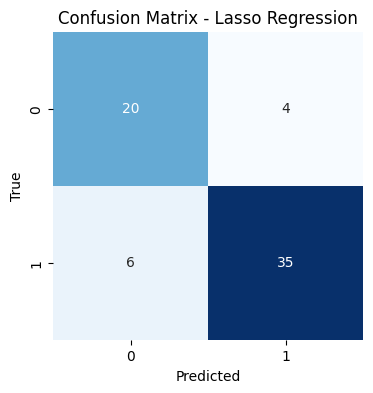

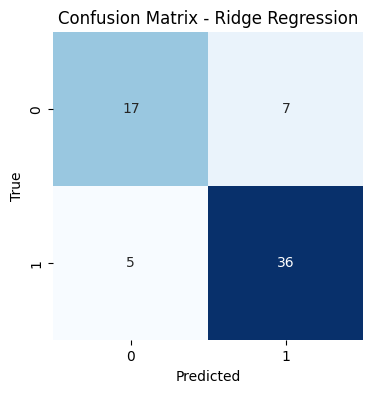

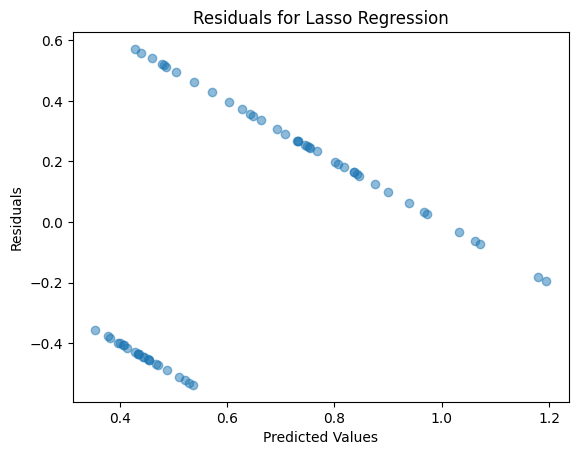

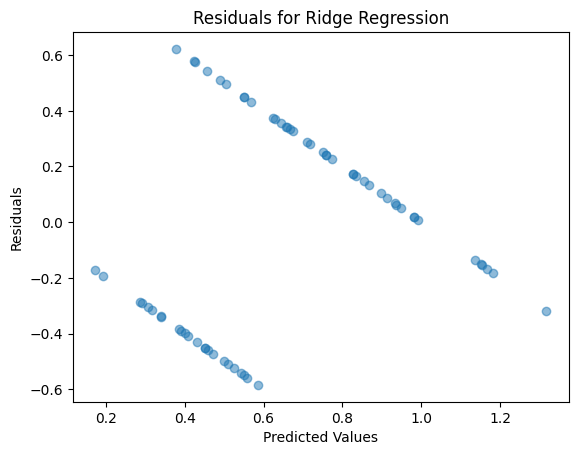

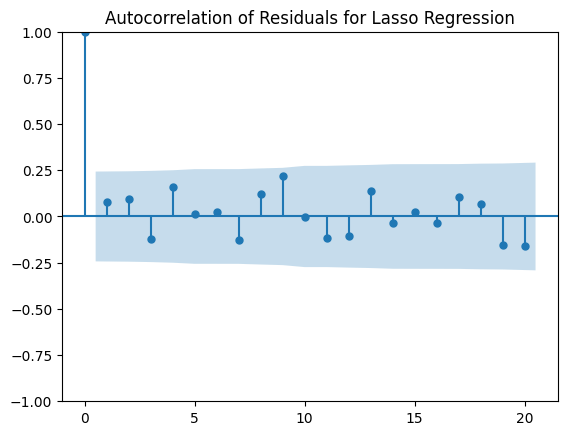

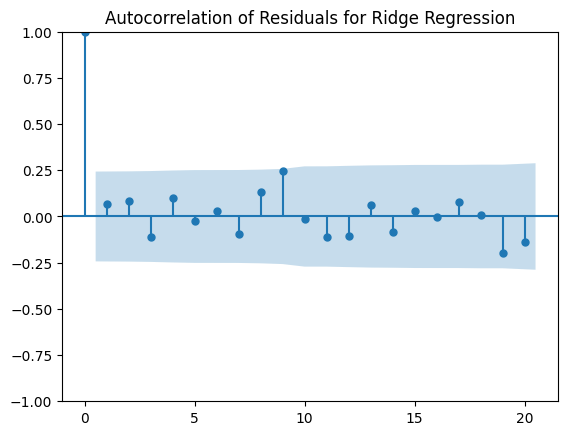

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

# Convert predictions to binary for classification evaluation
lasso_preds_binary = [1 if pred > 0.5 else 0 for pred in lasso_preds]
ridge_preds_binary = [1 if pred > 0.5 else 0 for pred in ridge_preds]

print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_preds))
print("Ridge Regression Accuracy:", accuracy_score(y_test, ridge_preds_binary))
# Evaluate regression performance
#print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_preds))
#print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_preds))

# Evaluate classification performance
#print("Lasso Regression Accuracy:", accuracy_score(y_test, lasso_preds_binary))
#print("Ridge Regression Accuracy:", accuracy_score(y_test, ridge_preds_binary))

# Function to calculate sensitivity and specificity
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return sensitivity, specificity


# Function to plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


sensitivity, specificity = calculate_sensitivity_specificity(y_test, lasso_preds_binary)
#print(f'Lasso Regression Sensitivity: {sensitivity:.4f}')
#print(f'Lasso Regression Specificity: {specificity:.4f}')

sensitivity, specificity = calculate_sensitivity_specificity(y_test, ridge_preds_binary)
print(f'Ridge Regression Sensitivity: {sensitivity:.4f}')
print(f'Ridge Regression Specificity: {specificity:.4f}')

# Plot confusion matrix for Lasso Regression
plot_confusion_matrix('Lasso Regression', y_test, lasso_preds_binary)

# Plot confusion matrix for Ridge Regression
plot_confusion_matrix('Ridge Regression', y_test, ridge_preds_binary)

# Plot residuals for Lasso Regression
plt.scatter(lasso_preds, y_test - lasso_preds, alpha=0.5)
plt.title('Residuals for Lasso Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plot residuals for Ridge Regression
plt.scatter(ridge_preds, y_test - ridge_preds, alpha=0.5)
plt.title('Residuals for Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plot autocorrelation of residuals for Lasso Regression
plot_acf(y_test - lasso_preds, lags=20)
plt.title('Autocorrelation of Residuals for Lasso Regression')
plt.show()

# Plot autocorrelation of residuals for Ridge Regression
plot_acf(y_test - ridge_preds, lags=20)
plt.title('Autocorrelation of Residuals for Ridge Regression')
plt.show()




In [ ]:
import statsmodels.api as sm

sm.tsa.acf(y_test, nlags =5)

array([ 1.        ,  0.13225453,  0.05719199, -0.05953721,  0.15401814,
        0.10334584])

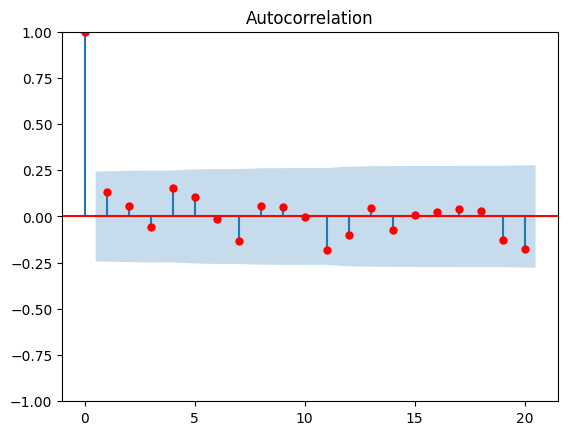

In [ ]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(y_test, lags=20, color = 'r')
plt.show()

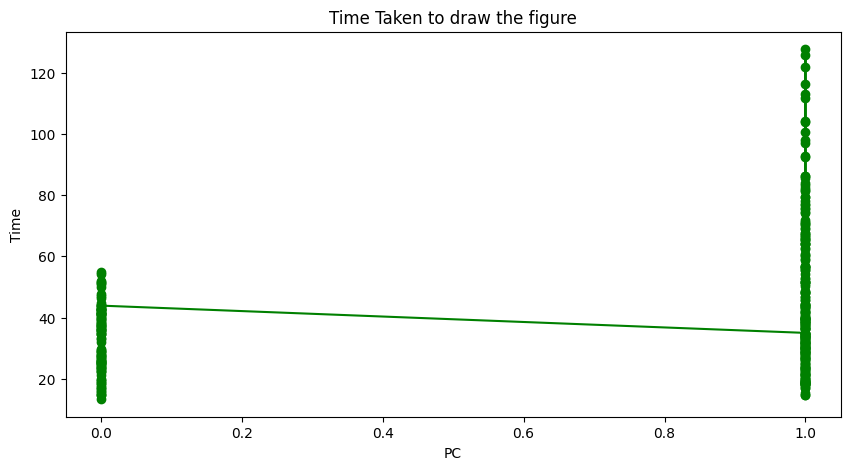

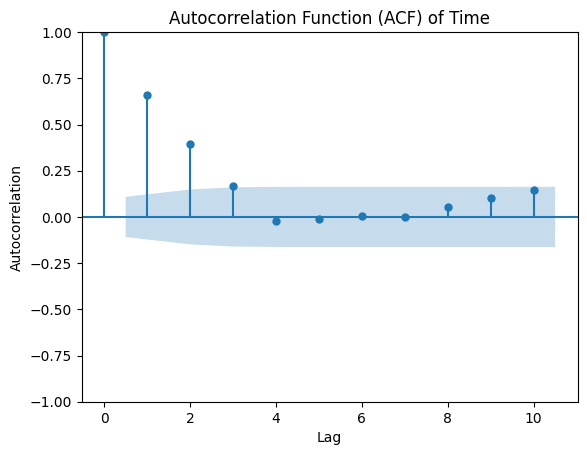

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(df['PC'], df['Time'], marker='o', color ='g')
plt.title('Time Taken to draw the figure')
plt.xlabel('PC')
plt.ylabel('Time')
plt.show()

# Plot the autocorrelation function (ACF)
plot_acf(df['Time'], lags=10)
plt.title('Autocorrelation Function (ACF) of Time')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

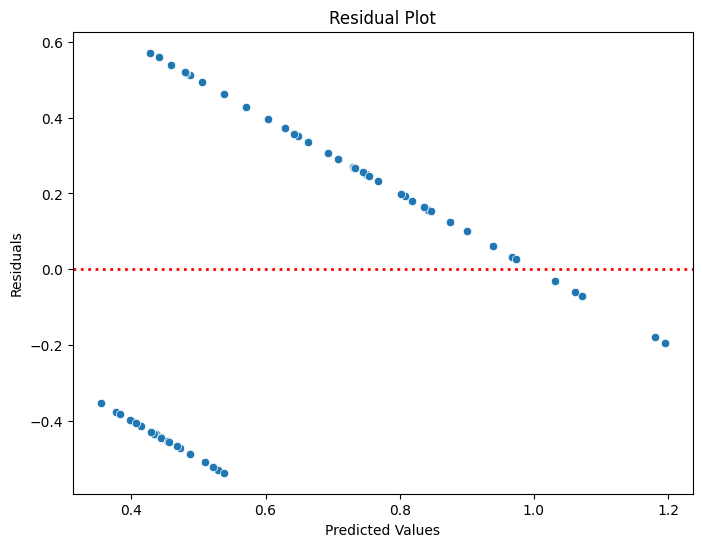

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


residuals = y_test - lasso_preds

plt.figure(figsize=(8, 6))
sns.scatterplot(x=lasso_preds, y=residuals)
plt.axhline(y=0, color='r', linestyle=':', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


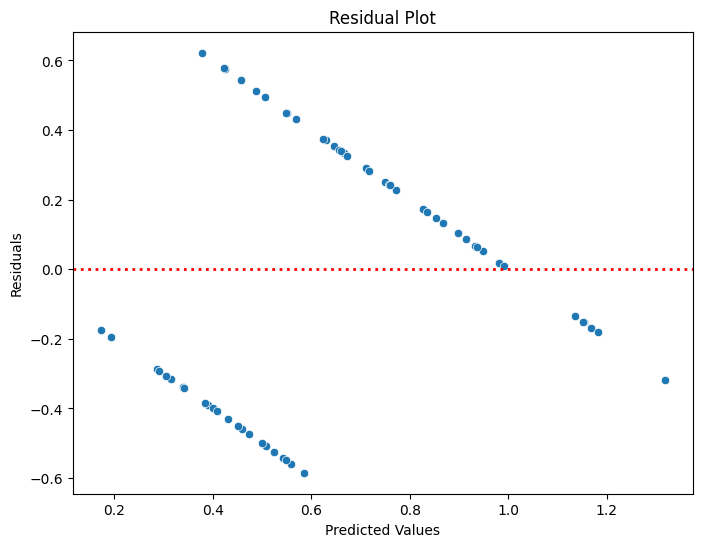

In [ ]:
residuals = y_test - ridge_preds

plt.figure(figsize=(8, 6))
sns.scatterplot(x=ridge_preds, y=residuals)
plt.axhline(y=0, color='r', linestyle=':', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

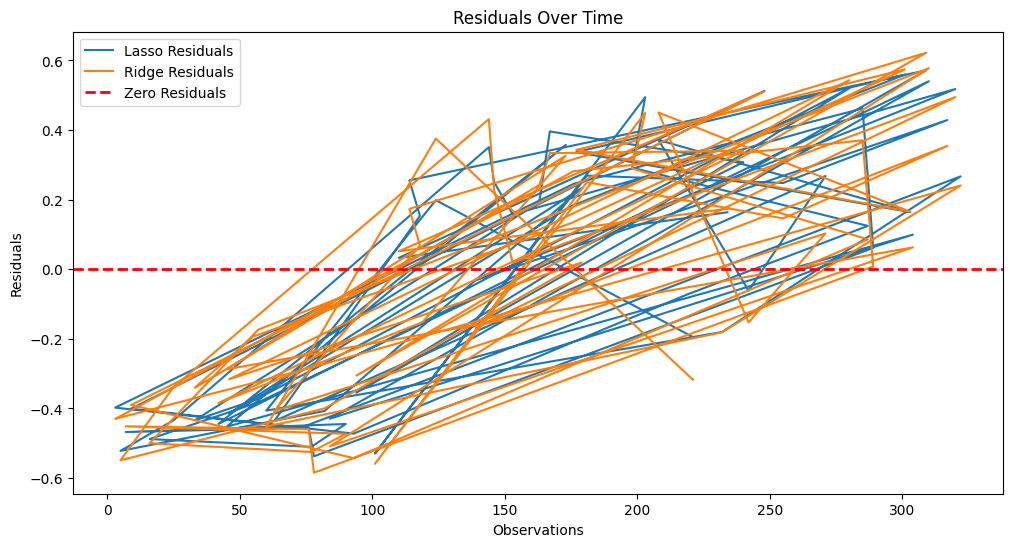

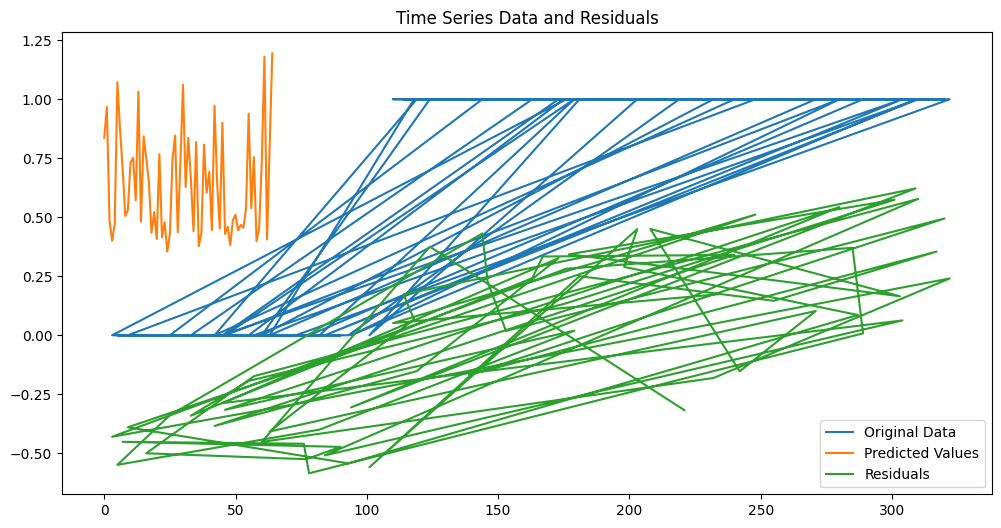

In [ ]:
# Calculate residuals
lasso_residuals = y_test - lasso_preds
ridge_residuals = y_test - ridge_preds

# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(lasso_residuals, label='Lasso Residuals')
plt.plot(ridge_residuals, label='Ridge Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Zero Residuals')
plt.legend()
plt.title('Residuals Over Time')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()


# Plot the time series data and residuals
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Original Data')
plt.plot(lasso_preds, label='Predicted Values')
plt.plot(residuals, label='Residuals')
plt.legend()
plt.title('Time Series Data and Residuals')
plt.show()

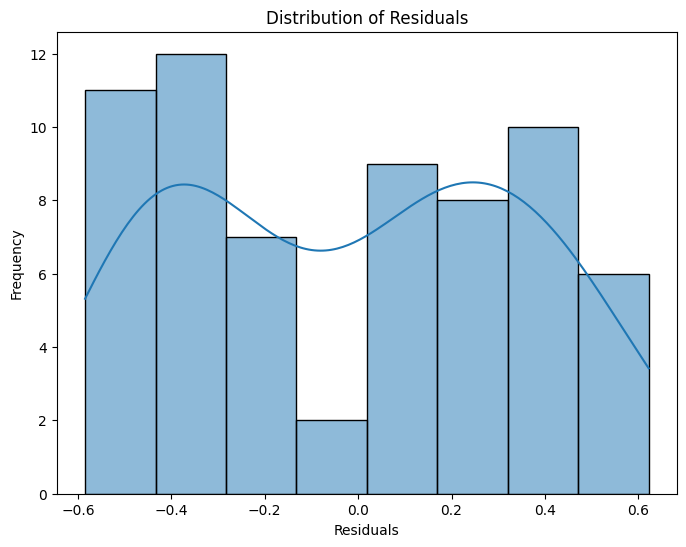

In [ ]:
# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


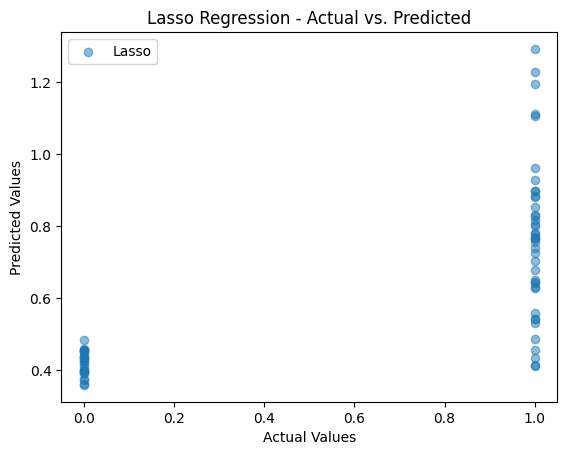

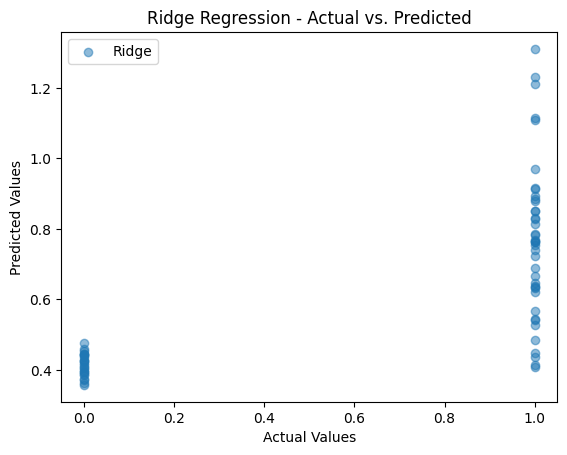

In [ ]:
import matplotlib.pyplot as plt

# Plotting for Lasso
plt.scatter(y_test, lasso_predictions, label='Lasso', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression - Actual vs. Predicted')
plt.legend()
plt.show()

# Plotting for Ridge
plt.scatter(y_test, ridge_predictions, label='Ridge', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression - Actual vs. Predicted')
plt.legend()
plt.show()


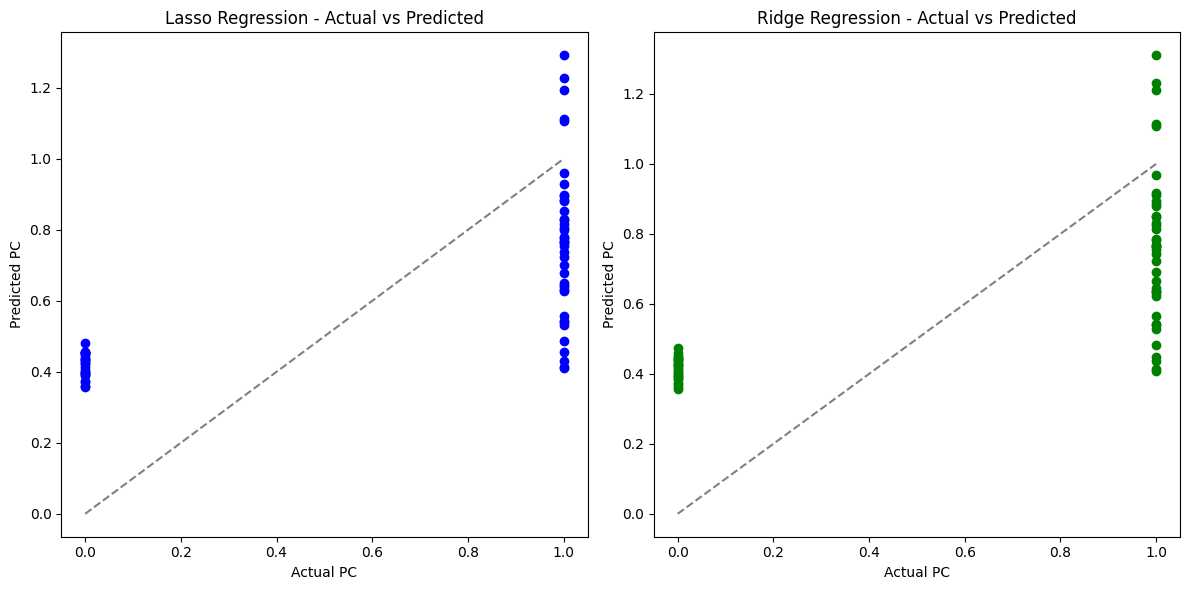

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Scatter plot for Lasso Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lasso_predictions, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Lasso Regression - Actual vs Predicted')
plt.xlabel('Actual PC')
plt.ylabel('Predicted PC')

# Scatter plot for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, ridge_predictions, color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Ridge Regression - Actual vs Predicted')
plt.xlabel('Actual PC')
plt.ylabel('Predicted PC')

plt.tight_layout()
plt.show()

Lasso Accuracy: 1.0
Ridge Accuracy: 0.9692307692307692
Lasso MSE: 0.0
Ridge MSE: 0.03076923076923077


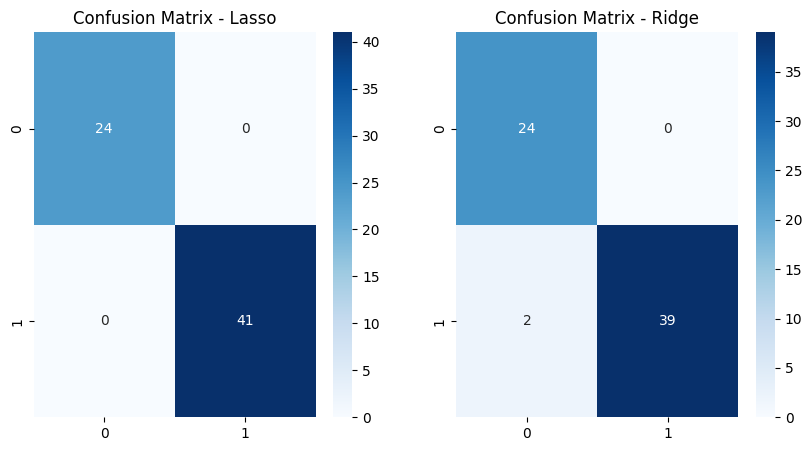

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error


# Split the data into features (X) and the target variable (y)
X = df.drop(['PC', 'DIAGNOSIS','ID'], axis=1)
y = df['PC']



# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Building
# Logistic Regression with L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')

# Logistic Regression with L2 regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear')

# Step 5: Train the Models
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Print or plot the results as needed
print("Lasso Accuracy:", accuracy_lasso)
print("Ridge Accuracy:", accuracy_ridge)
print("Lasso MSE:", mse_lasso)
print("Ridge MSE:", mse_ridge)

# Step 7: Plotting Evaluation Results (Example: Confusion Matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_lasso, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Lasso')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_ridge, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Ridge')

plt.show()


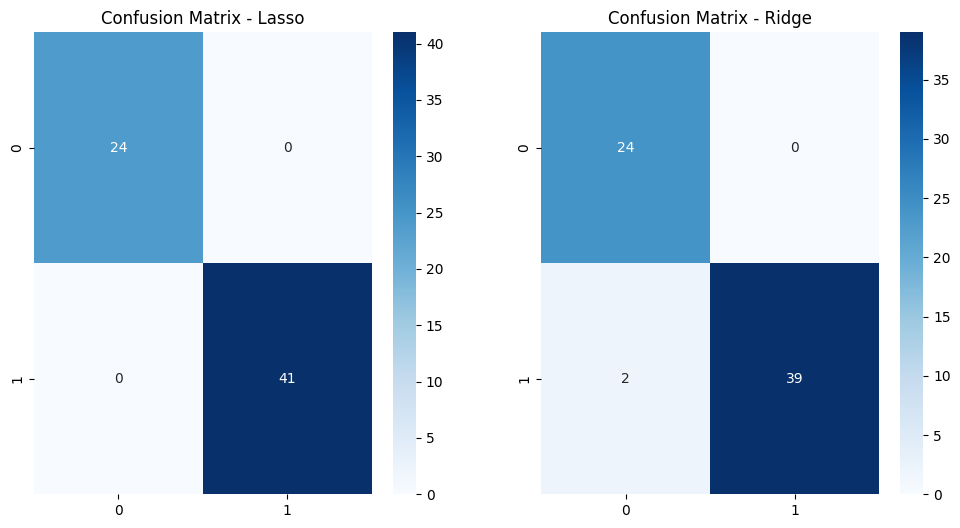

Accuracy (Lasso): 1.0
MSE (Lasso): 0.0
Classification Report (Lasso):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        41

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

Cross-Validation Scores (Lasso): [1.         0.95384615 0.93846154 0.98461538 0.78461538]

Accuracy (Ridge): 0.9692307692307692
MSE (Ridge): 0.03076923076923077
Classification Report (Ridge):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.95      0.97        41

    accuracy                           0.97        65
   macro avg       0.96      0.98      0.97        65
weighted avg       0.97      0.97      0.97        65

Cross-Validation Scores (Ridge): [1.         0.93846154 0.92307692 0.95384615 0.73

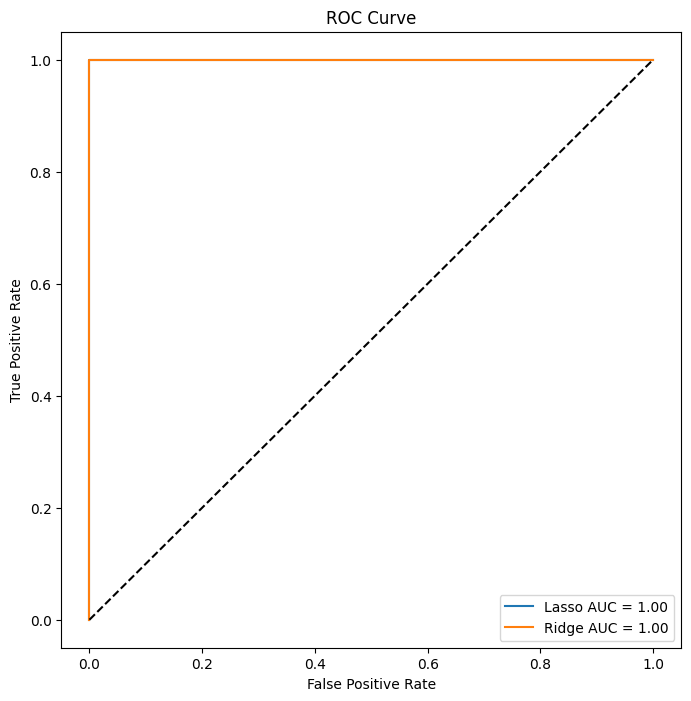

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict


# Select features and target variable
X = df.drop(['PC', 'DIAGNOSIS','ID'], axis=1)
y = df['PC']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with Lasso (L1 regularization)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Logistic Regression with Ridge (L2 regularization)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear')
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Classification report
classification_rep_lasso = classification_report(y_test, y_pred_lasso)
classification_rep_ridge = classification_report(y_test, y_pred_ridge)

# Cross-validation
cv_scores_lasso = cross_val_score(lasso_model, X, y, cv=5, scoring='accuracy')
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='accuracy')

# Cross-validated predictions
y_cv_pred_lasso = cross_val_predict(lasso_model, X, y, cv=5)
y_cv_pred_ridge = cross_val_predict(ridge_model, X, y, cv=5)

# ROC Curve
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, lasso_model.predict_proba(X_test)[:, 1])
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, ridge_model.predict_proba(X_test)[:, 1])

# AUC
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

# Plotting results
plt.figure(figsize=(12, 6))

# Confusion Matrix for Lasso
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix - Lasso')
sns.heatmap(conf_matrix_lasso, annot=True, fmt="d", cmap="Blues")


# Confusion Matrix for Ridge
plt.subplot(1, 2, 2)
plt.title('Confusion Matrix - Ridge')
sns.heatmap(conf_matrix_ridge, annot=True, fmt="d", cmap="Blues")


plt.show()

# Print results
print("Accuracy (Lasso):", accuracy_lasso)
print("MSE (Lasso):", mse_lasso)
print("Classification Report (Lasso):\n", classification_rep_lasso)
print("Cross-Validation Scores (Lasso):", cv_scores_lasso)

print("\nAccuracy (Ridge):", accuracy_ridge)
print("MSE (Ridge):", mse_ridge)
print("Classification Report (Ridge):\n", classification_rep_ridge)
print("Cross-Validation Scores (Ridge):", cv_scores_ridge)

# ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_lasso, tpr_lasso, label=f'Lasso AUC = {roc_auc_lasso:.2f}')
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge AUC = {roc_auc_ridge:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# **Unsupervised**

**PCA (Principal Component Analysis)**

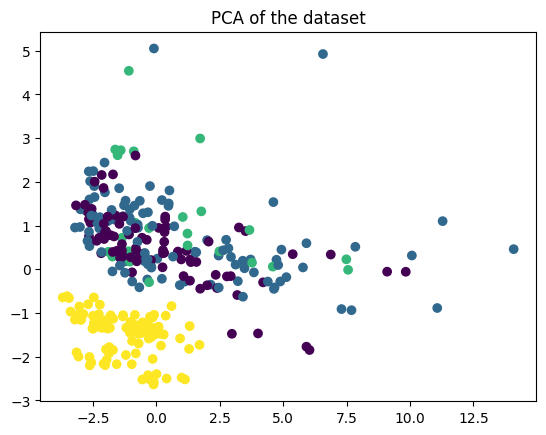

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


features = df.drop(['DIAGNOSIS', 'ID'], axis=1)
labels = df['DIAGNOSIS']

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Visualize the data
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.title('PCA of the dataset')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


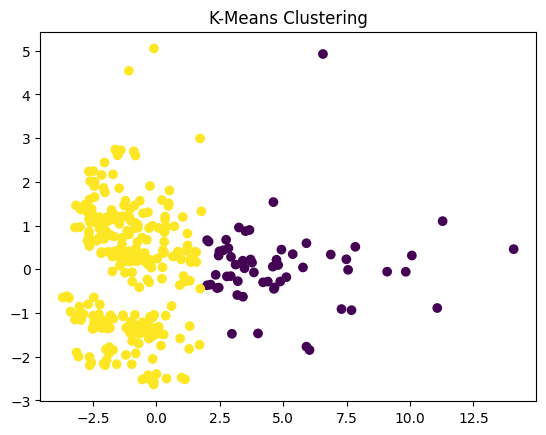

In [ ]:
from sklearn.cluster import KMeans


features = df.drop(['DIAGNOSIS','ID'], axis=1)

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2)  #  adjust the number of clusters based on the data
clusters = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


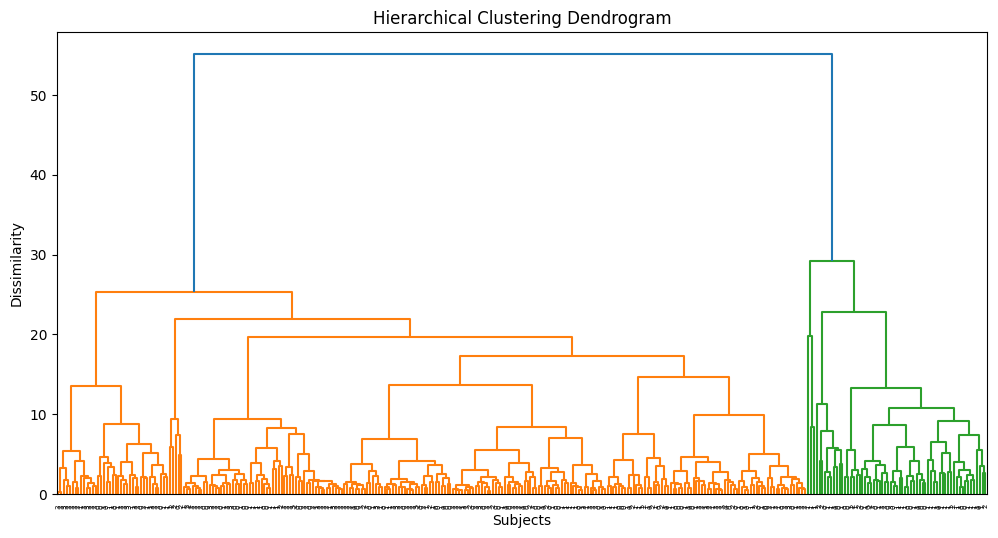

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
X = df.drop(["ID", "PC", "DIAGNOSIS"], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df["DIAGNOSIS"].tolist(), orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Subjects')
plt.ylabel('Dissimilarity')
plt.show()


<ipython-input-52-81fc4b070dc8>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()


Cluster Analysis by PC:
PC        0    1
Cluster         
1        98  164
2         0    3
3         4   56

Cluster Analysis by Diagnosis:
DIAGNOSIS   0   1   2   3
Cluster                  
1          69  74  21  98
2           0   3   0   0
3          19  30   7   4


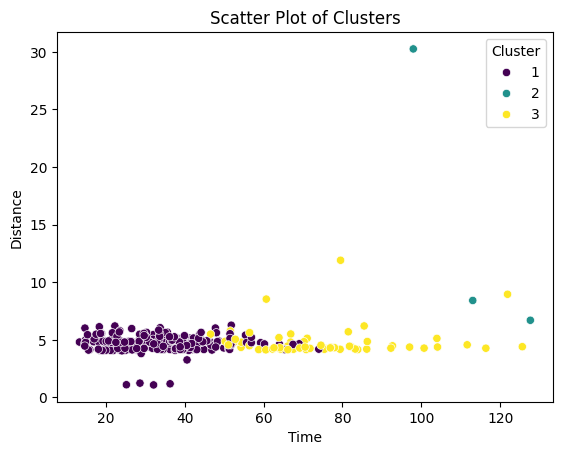

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to obtain a specific number of clusters
num_clusters = 3  # Change this according to the desired number of clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add the cluster labels to your DataFrame
df['Cluster'] = clusters

# Analyze the formed clusters
cluster_analysis = df.groupby('Cluster').mean()

# Explore separation between patients and controls within the clusters
cluster_analysis_pc = df.groupby(['Cluster', 'PC']).size().unstack(fill_value=0)
print("Cluster Analysis by PC:")
print(cluster_analysis_pc)

# Investigate if the clusters correspond to certain diagnosis categories
cluster_analysis_diagnosis = df.groupby(['Cluster', 'DIAGNOSIS']).size().unstack(fill_value=0)
print("\nCluster Analysis by Diagnosis:")
print(cluster_analysis_diagnosis)



# Visualization of clusters
sns.scatterplot(x='Time', y='Distance', hue='Cluster', data=df, palette='viridis')
plt.title('Scatter Plot of Clusters')
plt.show()


Cluster Analysis:

DataFrame contains the mean values for each feature within each cluster. It helps understand the characteristics of each cluster.

Cluster Analysis by PC:

DataFrame provides a count of patients and controls within each cluster. This helps to see how patients and controls are distributed across the formed clusters.

Cluster Analysis by Diagnosis:

DataFrame provides a count of different diagnosis categories within each cluster. This helps to investigate whether the clusters correspond to certain diagnosis categories.

Scatter Plot:

The scatter plot visualizes the clusters in a 2D space based on the features 'Time' and 'Distance'. Each point is colored according to its assigned cluster. The plot can help to observe the separation of clusters based on these features.


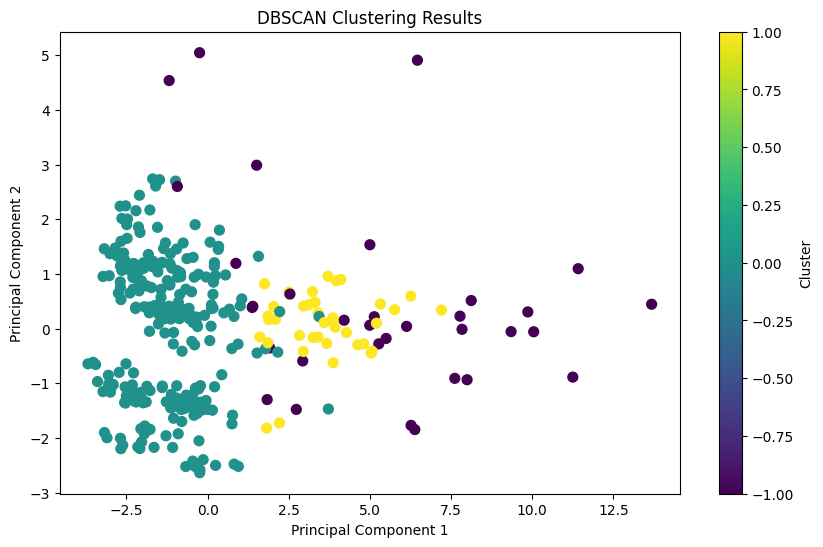

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Assuming your dataframe is named 'df'
# Drop irrelevant columns for clustering
df_cluster = df.drop(['DIAGNOSIS','ID'], axis=1)

# Standardize the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_cluster_pca = pca.fit_transform(df_cluster_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=10)
labels = dbscan.fit_predict(df_cluster_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = labels

# Visualize the results
plt.figure(figsize=(10, 6))

# Scatter plot for the first two principal components
plt.scatter(df_cluster_pca[:, 0], df_cluster_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.show()


will be better with tremor intensity